# Machine Learning Engineer Nanodegree - Capstone Project

## Project: ML model to accurately predict whether or not the patients in the dataset have diabetes

Data Souce - https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Problem Statement

The goal of this project is to build a machine learning model to predict the onset of diabetes based on some diagnostic measures. The expected outcome of this project is to contribute in the clinical research study related to diabetes.

Main Objective: Build a mathematical model to predict whether or not a patient has diabetes, based on certain diagnostic measurements.

Secondary Objective: Identify important indicateors or a cluster of features that cause diabetes.

## Datasets and Inputs

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database 
Note : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

|Feature Name| Description |Datetype |
|:-------------|:-------------|:-----|
|Pregnancies | Number of times pregnant |Numeric|
|Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|Numeric|
|BloodPressure|Diastolic blood pressure (mm Hg)|Numeric|
|SkinThickness|Triceps skin fold thickness (mm)|Numeric|
|Insulin|2-Hour serum insulin (mu U/ml)|Numeric|
|BMI|Body mass index (weight in kg/(height in m)^2)|Numeric|
|DiabetesPedigreeFunction|Diabetes pedigree function|Numeric|
|Age|Age (years)|Numeric|
|**Outcome**|Class variable (0 or 1)|Numeric|

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [44]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("diabetes.csv")

# Summary of the records
print "This dataset has {} samples with {} features each.".format(*data.shape)

# Display the first 10 record
print "\nDisplay the first 10 record"
display(data.head(n=10))

# Describe the data
print "Statistical description of dataset"
display(data.describe())

This dataset has 768 samples with 9 features each.

Display the first 10 record


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Statistical description of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals have diabetes or not. 

In [46]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_with_diabetes = data[data["Outcome"]==1].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_without_diabetes = data[data["Outcome"]==0].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_with_diabetes*100)/float(n_records)

# Print the results
print "Total number of individuals: {}".format(n_records)
print "Individuals with diabetes: {}".format(n_with_diabetes)
print "Individuals without diabetes: {}".format(n_without_diabetes)
print "Percentage of individuals with diabetes: {:.2f}%".format(greater_percent)


Total number of individuals: 768
Individuals with diabetes: 268
Individuals without diabetes: 500
Percentage of individuals with diabetes: 34.90%


0    500
1    268
Name: Outcome, dtype: int64
32.0    13
31.6    12
31.2    12
33.3    10
32.4    10
30.1     9
32.8     9
32.9     9
30.8     9
34.2     8
33.6     8
29.7     8
28.7     7
39.4     7
35.5     7
30.4     7
30.0     7
33.2     7
30.5     7
32.5     6
34.9     6
28.4     6
36.8     6
34.0     6
38.5     6
34.3     6
28.9     6
36.6     5
43.3     5
33.7     5
        ..
57.3     1
67.1     1
42.6     1
52.9     1
29.2     1
30.3     1
39.6     1
49.7     1
46.3     1
42.2     1
38.9     1
32.1     1
45.7     1
43.2     1
36.2     1
28.1     1
30.7     1
44.6     1
46.7     1
31.3     1
39.7     1
32.2     1
42.8     1
53.2     1
40.7     1
33.5     1
46.5     1
32.6     1
37.0     1
59.4     1
Name: BMI, Length: 171, dtype: int64


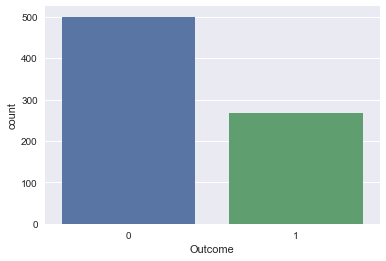

In [66]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count")
print data['Outcome'].value_counts()
print data['BMI'][data['BMI'] > 28].value_counts()

In [ ]:

# visualization of characterization features# visua 
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax1 = sns.countplot(x='work_accident', data=data, ax=ax1, saturation=1, facecolor='blue')
ax1.set_xlabel('Work Accident')
ax1.set_ylabel('Number of Employees')

fig.suptitle('Visualization of Categorical Features', fontsize=14, y=1.03)
plt.tight_layout()

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

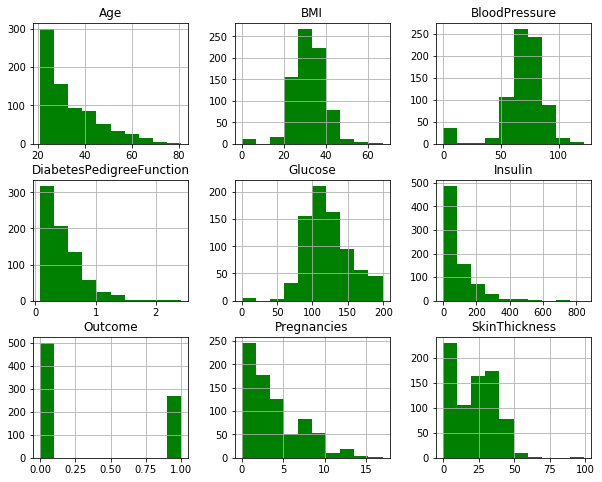

In [7]:
# Split the data into features and target label
outcome = data['Outcome']
features = data.drop('Outcome', axis = 1)

# Visualize skewed continuous features of original data
#data.hist(figsize=(10,8), bins=40, color='b', alpha=0.5)
data.hist(figsize=(10,8),color='g')
pd.DataFrame.skew(features, axis=0)

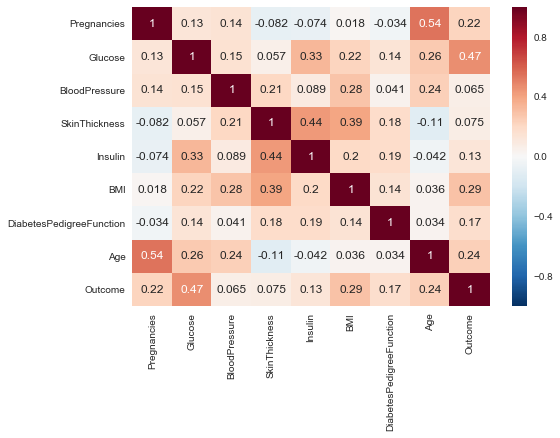

In [8]:
#import seaborn as sns
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.945910,5.003946,4.290459,3.583519,0.000000,3.543854,0.486738,3.931826
1,0.693147,4.454347,4.204693,3.401197,0.000000,3.317816,0.300845,3.465736
2,2.197225,5.214936,4.174387,0.000000,0.000000,3.190476,0.514021,3.496508
3,0.693147,4.499810,4.204693,3.178054,4.553877,3.370738,0.154436,3.091042
4,0.000000,4.927254,3.713572,3.583519,5.129899,3.786460,1.190279,3.526361


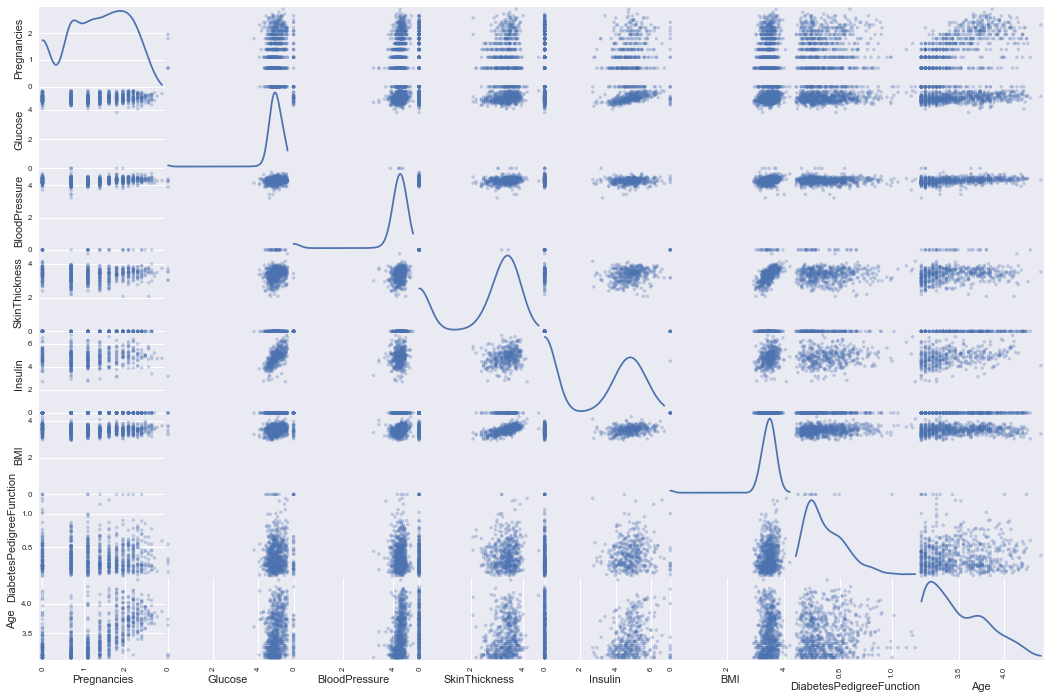

In [9]:
# TODO: Scale the data using the natural logarithm
features_log_transformed = features.apply(lambda x: np.log(x+1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(features_log_transformed, alpha = 0.3, figsize = (18,12), diagonal = 'kde');

display(features_log_transformed.head(n=5))

Pregnancies                -0.243478
Glucose                    -7.260790
BloodPressure              -4.116526
SkinThickness              -0.772956
Insulin                     0.065978
BMI                        -5.855034
DiabetesPedigreeFunction    1.117942
Age                         0.614664
dtype: float64

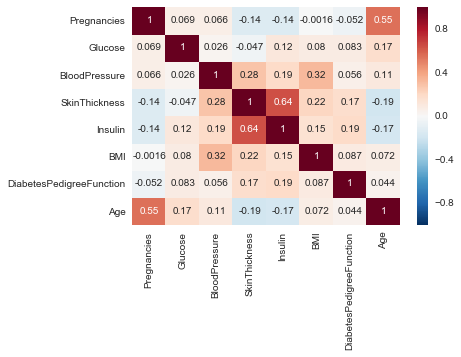

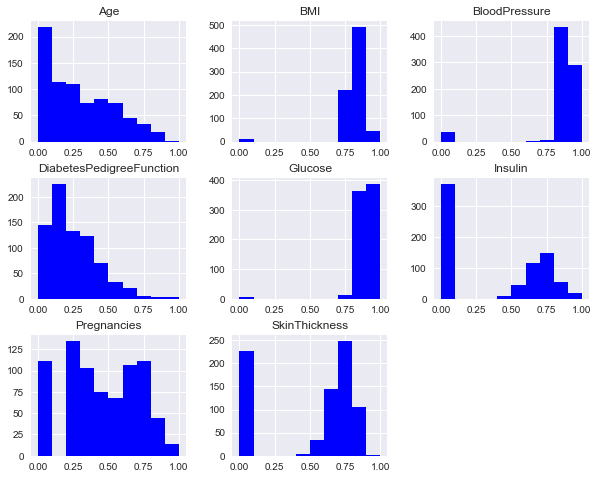

In [25]:
sns.heatmap(features_log_transformed.corr(), annot=True)
#log_data.hist(bins=10)
features_log_transformed.hist(color='b',figsize=(10,8))
pd.DataFrame.skew(features_log_transformed, axis=0)

In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

features_log_minmax_transformed = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transformed[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transformed.head(n = 5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673239,0.944441,0.891583,0.778151,0.000000,0.839581,0.356534,0.639050
1,0.239812,0.840710,0.873760,0.738561,0.000000,0.786030,0.195523,0.284791
2,0.760188,0.984263,0.867462,0.000000,0.000000,0.755862,0.380165,0.308180
3,0.239812,0.849290,0.873760,0.690106,0.675479,0.798568,0.068711,0.000000
4,0.000000,0.929966,0.771702,0.778151,0.760921,0.897058,0.965907,0.330870


In [21]:
for feature in features_log_minmax_transformed.keys():
    print feature

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [24]:
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in features_log_minmax_transformed.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(features_log_minmax_transformed[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(features_log_minmax_transformed[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    
    outliers_per_feature = features_log_minmax_transformed[~((features_log_minmax_transformed[feature] >= Q1 - step) & (features_log_minmax_transformed[feature] <= Q3 + step))]
    outliers_index = outliers_per_feature.index.tolist()
    # Cumulative list of outlier indexes 
    outliers = outliers + outliers_index
    
    print "Outliers count : {:d}".format(len(outliers_per_feature.index.tolist()))
    
# OPTIONAL: Select the indices for data points you wish to remove
# Removing the data points which are considered outliers for more than one feature. In this case - 6
common_outliers = [x for x in outliers if outliers.count(x) > 1]
unique_shared_outliers = list(set(common_outliers))

# Remove the outliers, if any were specified
print "--------------------------------------"

print "Unique outliers count : {:d}, List : {:s} ".format(len(unique_shared_outliers), unique_shared_outliers)

print "Number of sample records : {:d}".format(log_data.shape[0])

# Removing all outliers instead of unique and shared datapoints(unique_shared_outliers). If I remove only the unique and shared outliers then the entire PCA representation 
# is getting changed. I don't think the outliers can change the direction(+ve to -ve) of the firest two principal components.
# I couldn't explain this. 

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print "Number of sample records after removing outliers : {:d}".format(good_data.shape[0])

Data points considered outliers for the feature 'Pregnancies':
Outliers count : 0
Data points considered outliers for the feature 'Glucose':
Outliers count : 9
Data points considered outliers for the feature 'BloodPressure':
Outliers count : 41
Data points considered outliers for the feature 'SkinThickness':
Outliers count : 0
Data points considered outliers for the feature 'Insulin':
Outliers count : 0
Data points considered outliers for the feature 'BMI':
Outliers count : 14
Data points considered outliers for the feature 'DiabetesPedigreeFunction':
Outliers count : 13
Data points considered outliers for the feature 'Age':
Outliers count : 0
--------------------------------------
Unique outliers count : 10, List : [706, 4, 81, 426, 494, 445, 49, 371, 60, 522] 


NameError: name 'log_data' is not defined

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [12]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transformed, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 614 samples.
Testing set has 154 samples.


/Users/mmukherjee/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [28]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(outcome)
FP = outcome.count() - TP

TN = 0
FN = 0

# TODO: Calculate accuracy, precision and recall
accuracy = TP / float(TP + FP)
recall = TP / (TP + FN)
precision = accuracy

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
betaSquare = 0.5*0.5 

fscore = (1 + betaSquare) * ((precision*recall)/(betaSquare * precision + recall))

betaSquare2 = 2*2

fscore2 = (1 + betaSquare2) * ((precision*recall)/(betaSquare2 * precision + recall))


# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F0.5-score: {:.4f}]".format(accuracy, fscore)
print "Naive Predictor: [Accuracy score: {:.4f}, F2-score: {:.4f}]".format(accuracy, fscore2)

# Extra - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# It is a plot of true positive rate versus false positive rate. 
# The more area under the curve the better the model is at classification
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_true, y_scores)

Naive Predictor: [Accuracy score: 0.3490, F0.5-score: 0.4012]
Naive Predictor: [Accuracy score: 0.3490, F2-score: 0.7283]


In [72]:

precision=0.43
recall=0.91
betaSquare2 =2
fscore2 = (1 + betaSquare2) * ((precision*recall)/(betaSquare2 * precision + recall))
print fscore2

0.663220338983


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

The following three supervised learning models are appropriate for this problem. 

***1. Logistic Regression ***

- Real-world application
    * Predition of football match or election
    
- Model's strength

    * Simple algo and implementation
    * Training time is less 

- Model's weakness
    * High bias - Sometimes, it generalizes the data. 

- Model choice ( w.r.t Census dataset )
    * Here the output is categorical(earning more or less thank 50K). Since it is a classification problem, so 'Logistic Regression' is one of the obvious choice to start with.

***1. Decision Tree ***

- Real-world application
    * customer relationship management and fraud detection 
    * Ref - http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/ 
    
- Model's strength
    * Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
    * Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
    * Allow the addition of new possible scenarios.
    * Help determine worst, best and expected values for different scenarios.
    * Can be combined with other decision techniques.
    * Ref - https://en.wikipedia.org/wiki/Decision_tree#Advantages_and_disadvantages
    
- Model's weakness
    * Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.

- Model choice ( w.r.t Census dataset )
    * This dataset has multiple key attributes which can influence the prediction.

***1. Ensemble Methods ( AdaBoost ) ***

- Real-world application
    * Analyzing Sentiment( Output - Positive/Negative ). This model can be used along with Decision Tree to optimize the performance. 
    
- Model's strength
    * AdaBoost is best used to boost the performance of decision trees on binary classification problems.

- Model's weakness
    * It tries to correct the miss-classified points repeatedly, so it doesn't do good job when data quality is bad or data has too much outliers. 
    
- Model choice ( w.r.t Census dataset )
    * Census data set has a well structured data set. Before applying this alogorithm, we can easily normalize attributes which have high variance. 
    * This is a classification problem which can be solved using Decision Tree. AdaBoost will help to increase the model performance significantly. 
    
    * Ref - https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/
    
#### Further Reading - 
* [advantages-of-different-classification-algorithms](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms)
* [model-selection-in-datascience](http://sebastianraschka.com/faq/docs/model-selection-in-datascience.html)
* [plot_classifier_comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
* [machine-learning-algorithm-choice](https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-algorithm-choice)
* [data-science-machine-learning-cheat-sheets-updated](http://www.kdnuggets.com/2016/12/data-science-machine-learning-cheat-sheets-updated.html)
    

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [14]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    print 'sample_size - ', sample_size
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

sample_size -  6
LogisticRegression trained on 6 samples.
sample_size -  61
LogisticRegression trained on 61 samples.
sample_size -  614
LogisticRegression trained on 614 samples.
sample_size -  6
DecisionTreeClassifier trained on 6 samples.
sample_size -  61
DecisionTreeClassifier trained on 61 samples.
sample_size -  614
DecisionTreeClassifier trained on 614 samples.
sample_size -  6
AdaBoostClassifier trained on 6 samples.
sample_size -  61
AdaBoostClassifier trained on 61 samples.
sample_size -  614
AdaBoostClassifier trained on 614 samples.


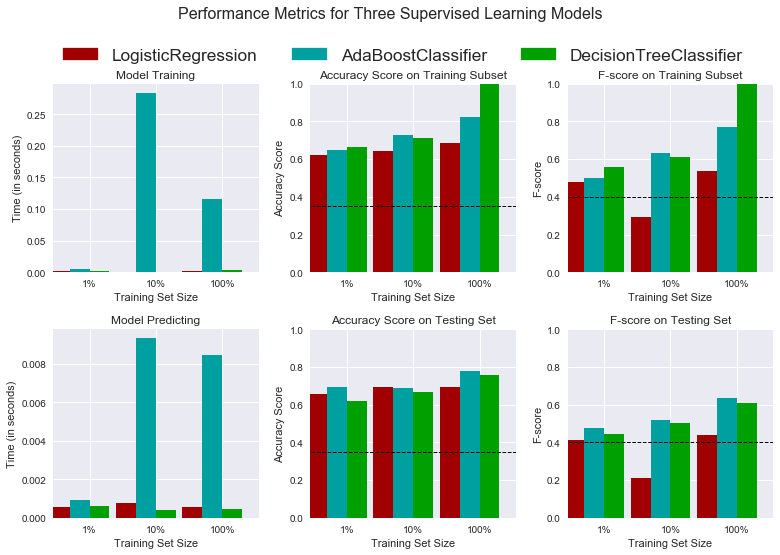

In [15]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = linear_model.LogisticRegression(random_state=11)
clf_B = tree.DecisionTreeClassifier(random_state=11)
clf_C = AdaBoostClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
# print int(X_train.shape[0]*(0.01)), int(X_train.shape[0]*(0.1)), X_train.shape[0]
samples_100 = X_train.shape[0]
samples_10 = int(X_train.shape[0]*(0.1))
samples_1 = int(X_train.shape[0]*(0.01))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

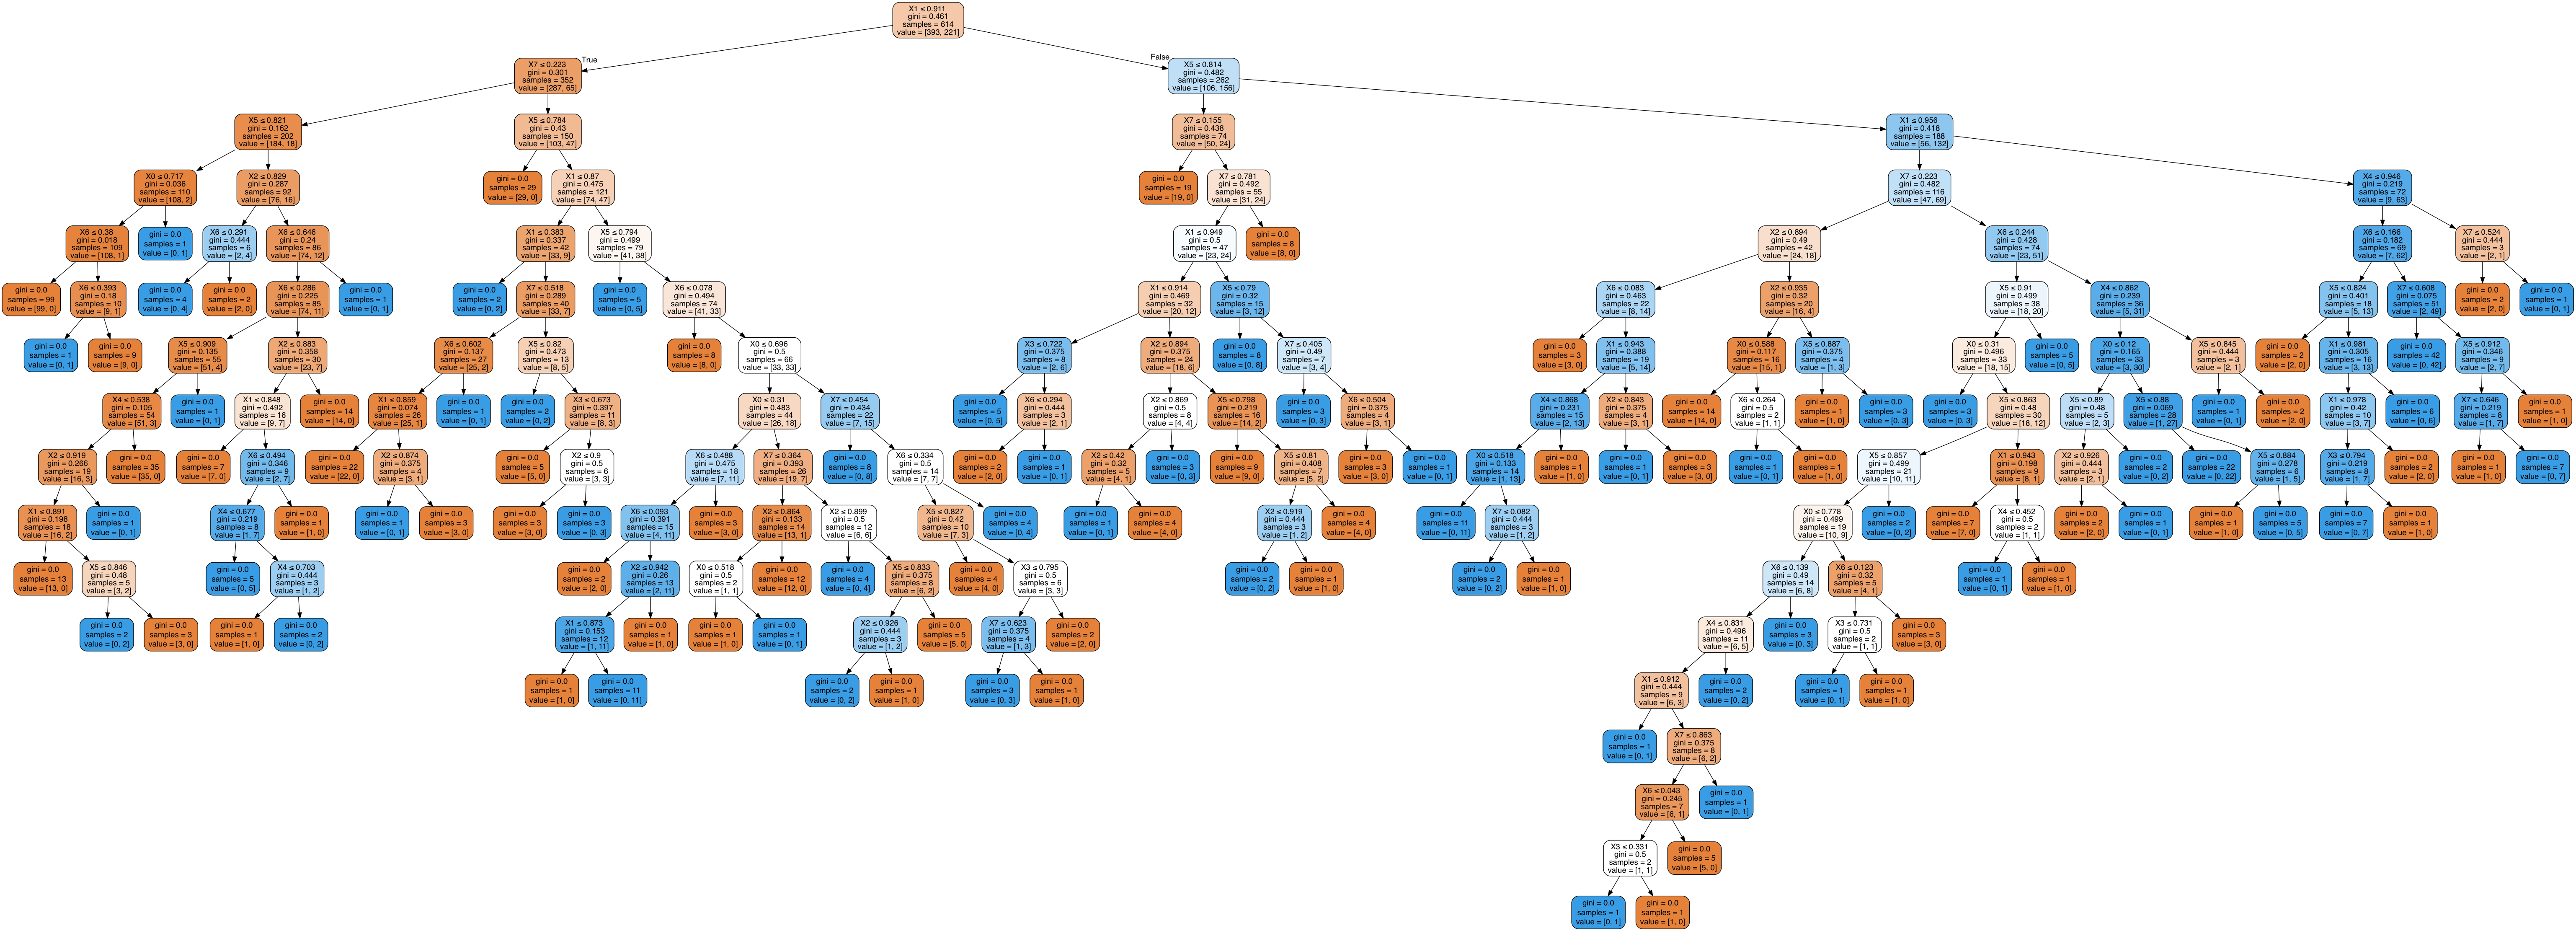

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_B, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

For this dataset, it is really important to predict the number of persons who make more than 50K. If the model predicts that a given person can donate money(in other words make more than 50K per year) but actually isn't then that would cause a severe negative effect. While calculating the algorithm's performance(based on a standard scoring mechanism), we have given emphasis on the model's precision. 

We evaluated all possible algorithms to find the best model that would predict the outcome with a significantly high precision. 
After doing comparative analysis, we restricted our focus on the following 3 algorithms. 

1. Logistic Regression 
2. Decision Tree
3. Ensemble Method ( AdaBoost ) 

We found that AdaBoost algoritm has the best performance. This algorithm internally uses the Decision Tree algorithm and optimzed its performance.
Ref - Accuracy score and F-score on testing data are 0.8576 and 0.7246. 
Since 'census data' is not huge in size, so this model didn't take much time for training. But if we had a larger data set, then this model could have taken a significantly long time for training. 
If we had larger dataset and an immidiate need to use this in production environment, then we could have used the 'Logistic Regression' model which gives the 2nd best performance.

PFB section which shows the exact error% of the 3 models which we have used in the experimentation. 


Total Error (False Negative + False Positive) % 
-----------------------------------------------

Model - AdaBoostClassifier   - 22.08%
Model - LogisticRegression   - 30.52%
Model - Decision Tree   - 24.03%

Confusion-matrix of the AdaBoost classifier
-------------------------------------------

(89, 18, 16, 31)


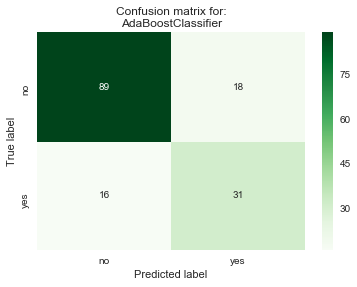

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute confusion matrix for a model
print "Total Error (False Negative + False Positive) % \n-----------------------------------------------\n"
def create_confusion_matrix(model, model_name):
    cm = confusion_matrix(y_test.values, model.predict(X_test))
    tn, fp, fn, tp =  cm.ravel()
    print "Model - {:s}  ".format(model_name),  "- {:.2f}%".format((fp + fn)*100/float(y_test.count()))
    
create_confusion_matrix(clf_C, "AdaBoostClassifier")
create_confusion_matrix(clf_A, "LogisticRegression")
create_confusion_matrix(clf_B, "Decision Tree")

# Display confusion-matrix of the AdaBoost classifier
print "\nConfusion-matrix of the AdaBoost classifier\n-------------------------------------------\n"
model = clf_C
cm = confusion_matrix(y_test.values, model.predict(X_test))

tn, fp, fn, tp =  cm.ravel()
# print (tn, fp, fn, tp)
# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

print (tn, fp, fn, tp)


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

We chose the final model called AdaBoost classifier which is a type of Ensemble method. This approach tries to combine the predictions of several base learners(models) built with a given learning algorithm(we used 'Decision Tree') in order to create a generalized, robust and complex single estimator. Each one of this base learner(known as 'weak learner') makes predictions which are correct at least 50% of the time. A set of such weak(and simple) learners sequentially classify the whole dataset with a unique dimension(split point) and measure the complexity of each data points by assigning a weight. Every weak learner focuses to classify the data points which were marked as complex(according to weight value) by the previous classifier. This general and provably effective method of producing a very accurate prediction rule by combining weak/simple and moderately inaccurate rules is known as Boosting.

In this case, the AdaBoost based model fits the census data well and it operates with an optimized(~83%) accuracy.

Book Ref - [Boosting](https://mitpress.mit.edu/sites/default/files/titles/content/9780262017183_sch_0001.pdf) By Robert E. Schapire and Yoav Freund

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [75]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
#clf = tree.DecisionTreeClassifier(random_state=11)

#DTC = tree.DecisionTreeClassifier(random_state = 11, min_samples_split=5, max_depth=8)
#I will experiment with the DecisionTreeClassifier parameters in future. 
# Further reading required - To boost performance, it is essential to have good feature engineering and data conditioning
clf = AdaBoostClassifier(random_state=11)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
    
#parameters = {'min_samples_split' : [2], 'max_depth': [11], 'min_samples_split': [4]}  

#n_estimators : integer, optional (default=50)
#The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
parameters = {'n_estimators':[100, 200, 300]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2))

from sklearn.metrics import recall_score
print recall_score(y_test, best_predictions)

Unoptimized model
------
Accuracy score on testing data: 0.7792
F-score on testing data: 0.6379

Optimized Model
------
Final accuracy score on the testing data: 0.8117
Final F-score on the testing data: 0.6992
0.702127659574


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8576         |    0.8663       |
| F-score        |    0.7246         |    0.7425       |


**Answer: **

    The 'accuracy score' and 'F-score' on the testing data are 0.8663 and 0.7425. 
    The equivalent scores for Naive Predictor was 0.2478 and 0.2917
    
    The result of the optimized model is much better than the navie predictor. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Before doing the analysis, I did some high level analysis of the cencus data using excel.

Based on some asumptions, I think the following 5 features are really important. 

1. Capital gain 
2. Captial loss 
    - Above two attributes are key features to determine if a person makes more than $50K. I think these two attributes should be considered together( like difference of gain and loss) to get a better picture. 

3. Education -
    - In general, persons with higher educational degree (undergrad college degree and above) should have better chance of making $50K per year.

2. Hours-per-Week - 
    - For hourly paying jobs, more income is kind of propotional to more number of working hours.

5. WorkClass - 
    - All persons who are doing some job(specially in Govt. sectors) should have better financial stability or earning potential than the other groups. 
 [ Available Workclasses - State-gov,Self-emp-not-inc,Private,Federal-gov,Local-gov,Self-emp-inc,Without-pay ]
 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

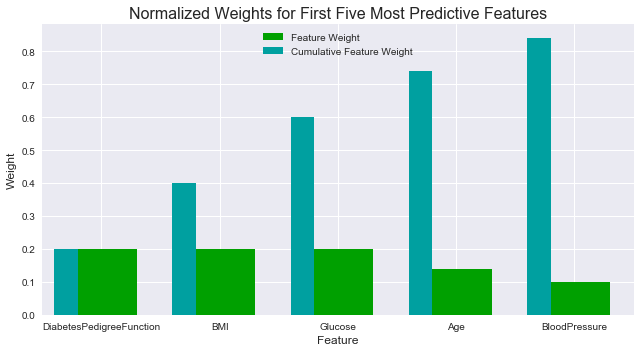

In [19]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=11)
model.fit(X_train, y_train)

#print X_train.shape
#print len(model.feature_importances_)
#print np.sum(model.feature_importances_)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

#### Results:

|    Feature Imp - My Observation    | Feature Imp - Actual based on data  |
| :--------------------------------: | :---------------------------------: | 
| Capital Gain.                      | Capital Loss                        |
| Capital Loss                       | Age                                 |
| Education.                         | Capital Gain                        |
| Hours-per-week                     | hours-per-week                      |
| Work Class.                        | Education-num                       |

I guessed 4 out of 5 important features based on my high-level analysis using excel. 
I was not sure about the 'Age' attribute and its significance on the earning capacity. I also thought that 'Work Class' is an important feature for this use-case. I think that the data and the related important features-set may vary based on country/state/econoimic condition.

According to the visualization generated by 'model.feature_importances_', 'capital-loss' followed by 'age' are the top two important features in predicting a subject's earning potential above $50K.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8117
F-score on testing data: 0.6904

Final Model trained on reduced data
------
Accuracy on testing data: 0.7922
F-score on testing data: 0.6584


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Inspite of reducing the features set, the model is maintaing a significanlty high accuracty(~97% to the original ) and f-score(94%). If training time was a factoer, I would have definately considered this model with the reduced features set(including only the important ones). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.